
## Import pyActigraphy library + basic libraries


In [1]:
import pyActigraphy

In [2]:
import plotly.graph_objs as go

In [3]:
import pandas as pd
import numpy as np

___


## Import RAW file(s) + specify the length of data to read (period = ) 
check https://ghammad.github.io/pyActigraphy/pyActigraphy-SSt-log.html discard data

In [4]:
rawATR = pyActigraphy.io.read_raw_atr('/Users/mariomiguel/OneDrive/Actigraphy Data/ok/101501.txt')

In [5]:
rawATR.temperature.mean() #example of how to extract other channels from the acttrust actimeter

29.473947814742395

In [115]:
rawATR.temperature

DATE/TIME
2015-05-14 00:00:00    32.61
2015-05-14 00:01:00    32.57
2015-05-14 00:02:00    32.77
2015-05-14 00:03:00    32.17
2015-05-14 00:04:00    31.42
                       ...  
2015-05-19 07:40:00    24.58
2015-05-19 07:41:00    23.76
2015-05-19 07:42:00    23.40
2015-05-19 07:43:00    23.13
2015-05-19 07:44:00    22.96
Freq: T, Name: TEMPERATURE, Length: 7665, dtype: float64

___

## Raw File - Basic Features

In [7]:
rawATR.start_time

Timestamp('2015-05-14 00:00:00', freq='T')

In [8]:
rawATR.data.head(15) # first 15 lines of the data

DATE/TIME
2015-05-14 00:00:00       3
2015-05-14 00:01:00       5
2015-05-14 00:02:00    8399
2015-05-14 00:03:00    5195
2015-05-14 00:04:00     300
2015-05-14 00:05:00      16
2015-05-14 00:06:00       9
2015-05-14 00:07:00       2
2015-05-14 00:08:00      10
2015-05-14 00:09:00      38
2015-05-14 00:10:00      11
2015-05-14 00:11:00      93
2015-05-14 00:12:00      59
2015-05-14 00:13:00      64
2015-05-14 00:14:00      47
Freq: T, Name: PIM, dtype: int64

In [11]:
raw14 = rawATR.data['2015-05-14'] # data per day (first day as an example)

In [12]:
rawATR.data.resample('D').mean() # plot per day (sum)

DATE/TIME
2015-05-14    6359.453472
2015-05-15    5908.664583
2015-05-16    4740.904861
2015-05-17    3512.305556
2015-05-18    5114.637500
2015-05-19    1693.944086
Freq: D, Name: PIM, dtype: float64

In [13]:
rawATR.frequency # sampling frequency

Timedelta('0 days 00:01:00')

In [14]:
rawATR.data.index

DatetimeIndex(['2015-05-14 00:00:00', '2015-05-14 00:01:00',
               '2015-05-14 00:02:00', '2015-05-14 00:03:00',
               '2015-05-14 00:04:00', '2015-05-14 00:05:00',
               '2015-05-14 00:06:00', '2015-05-14 00:07:00',
               '2015-05-14 00:08:00', '2015-05-14 00:09:00',
               ...
               '2015-05-19 07:35:00', '2015-05-19 07:36:00',
               '2015-05-19 07:37:00', '2015-05-19 07:38:00',
               '2015-05-19 07:39:00', '2015-05-19 07:40:00',
               '2015-05-19 07:41:00', '2015-05-19 07:42:00',
               '2015-05-19 07:43:00', '2015-05-19 07:44:00'],
              dtype='datetime64[ns]', name='DATE/TIME', length=7665, freq='T')

___

## Basic Raw Visualization and computation
rawAWD is a time series. Therefore python time series methods apply

In [116]:
rawATR.data.sum()

37703475

In [16]:
rawATR.data.mean()

4918.913894324854

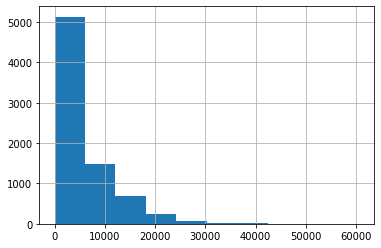

In [17]:
rawATR.data.hist()

In [18]:
from datetime import datetime
rawATR.data.idxmax()
Max = rawATR.data.idxmax()
Max = Max.strftime("%H:%M:%S")
Max

'07:47:00'

In [19]:
rawATR.data.idxmin()
Min = rawATR.data.idxmin()
Min = Min.strftime("%H:%M:%S")
Min

'01:10:00'

In [20]:
from plotly.graph_objs import Figure, FigureWidget, Layout, Scatter
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [21]:
layout = Layout(
    title="Raw Actimetry data",
    xaxis=dict(title="Date time"), 
    yaxis=dict(title="Activity/phase"), 
    showlegend=False
)

iplot(Figure(data=[Scatter(x=rawATR.data.index.astype(str), y=rawATR.data)], layout=layout))

___

## Sleep-wake cycle inference
pyActigraphy has different methods of sleep inference. Check https://ghammad.github.io/pyActigraphy/pyActigraphy-Sleep-Algorithms.html for details

In [22]:
CK = rawATR.CK()

In [23]:
CK.to_csv("CK.csv") # to save the cole-kripke output to file

In [129]:
layout = go.Layout(title="Rest/Activity detection",xaxis=dict(title="Date time"), yaxis=dict(title="Counts/period"), showlegend=False)

In [130]:
layout.update(yaxis2=dict(title='Classification',overlaying='y',side='right'), showlegend=True);

In [133]:
go.Figure(data=[
    go.Scatter(x=rawATR.data.index.astype(str),y=rawATR.data, name='Data'),
    go.Scatter(x=CK.index.astype(str),y=CK, yaxis='y2', name='CK')
], layout=layout)

In [27]:
roenneberg = rawATR.Roenneberg()
roenneberg_thr = rawATR.Roenneberg(threshold=0.25, min_seed_period='30min')

/opt/anaconda3/lib/python3.7/site-packages/pyActigraphy/sleep/scoring/utils.py:99: RuntimeWarning:

invalid value encountered in greater



In [28]:
crespo = rawATR.Crespo()

In [29]:
go.Figure(data=[
    go.Scatter(x=rawATR.data.index.astype(str),y=rawATR.data, name='Data'),
    go.Scatter(x=crespo.index.astype(str),y=crespo, yaxis='y2', name='Crespo'),
    #go.Scatter(x=roenneberg.index.astype(str),y=roenneberg, yaxis='y2', name='Roenneberg'),
    go.Scatter(x=roenneberg_thr.index.astype(str),y=roenneberg_thr, yaxis='y2', name='Roenneberg (Thr:0.25)')
], layout=layout)

In [120]:
aot = rawATR.Roenneberg_AoT(threshold=0.10, min_seed_period='15min')


In [121]:
aot

(DatetimeIndex(['2015-05-14 05:52:00', '2015-05-15 05:55:00',
                '2015-05-15 15:23:00', '2015-05-16 06:19:00',
                '2015-05-17 01:19:00', '2015-05-18 05:37:00',
                '2015-05-18 13:15:00', '2015-05-19 05:58:00'],
               dtype='datetime64[ns]', name='DATE/TIME', freq=None),
 DatetimeIndex(['2015-05-14 00:26:00', '2015-05-14 22:56:00',
                '2015-05-15 14:47:00', '2015-05-15 22:37:00',
                '2015-05-16 15:43:00', '2015-05-17 21:28:00',
                '2015-05-18 12:34:00', '2015-05-18 23:06:00'],
               dtype='datetime64[ns]', name='DATE/TIME', freq=None))

In [60]:
aot[0]-aot[1] # Whant to know the sleep duration for each cycle?

TimedeltaIndex(['05:26:00', '06:59:00', '06:59:00', '01:24:00', '05:07:00',
                '06:52:00'],
               dtype='timedelta64[ns]', name='DATE/TIME', freq=None)

In [61]:
rawATR.sleep_durations(duration_min='4h', algo='Roenneberg') # easier way to retrieve sleep bouts

[Timedelta('0 days 05:26:00'),
 Timedelta('0 days 06:59:00'),
 Timedelta('0 days 06:59:00'),
 Timedelta('0 days 05:07:00'),
 Timedelta('0 days 06:52:00')]

In [63]:
rawATR.sleep_durations(duration_min='6h', algo='Roenneberg') # easier way to retrieve sleep bouts

[Timedelta('0 days 06:59:00'),
 Timedelta('0 days 06:59:00'),
 Timedelta('0 days 06:52:00')]

In [123]:
sleepbouts = rawATR.sleep_bouts(duration_min='6h', algo='Roenneberg')
type(sleepbouts)
sleepbouts

[DATE/TIME
 2015-05-14 22:56:00     336
 2015-05-14 22:57:00       8
 2015-05-14 22:58:00     172
 2015-05-14 22:59:00       7
 2015-05-14 23:00:00      12
                        ... 
 2015-05-15 05:51:00     679
 2015-05-15 05:52:00       6
 2015-05-15 05:53:00       8
 2015-05-15 05:54:00       5
 2015-05-15 05:55:00    8535
 Freq: T, Name: PIM, Length: 420, dtype: int64,
 DATE/TIME
 2015-05-15 23:21:00       3
 2015-05-15 23:22:00       3
 2015-05-15 23:23:00       5
 2015-05-15 23:24:00       8
 2015-05-15 23:25:00       8
                        ... 
 2015-05-16 06:16:00    4736
 2015-05-16 06:17:00       1
 2015-05-16 06:18:00       4
 2015-05-16 06:19:00     563
 2015-05-16 06:20:00    9397
 Freq: T, Name: PIM, Length: 420, dtype: int64,
 DATE/TIME
 2015-05-18 23:06:00      13
 2015-05-18 23:07:00      22
 2015-05-18 23:08:00       9
 2015-05-18 23:09:00      24
 2015-05-18 23:10:00      10
                        ... 
 2015-05-19 05:54:00       8
 2015-05-19 05:55:00     872
 

___

## Activity Onset and Offset

In [34]:
A_Onset = rawATR.AonT(freq='10min', binarize=True)
A_Onset

Timedelta('0 days 05:40:00')

In [35]:
A_Offset = rawATR.AoffT(freq='1min', binarize=True)
A_Offset

Timedelta('0 days 22:54:00')

___

## Basic Non-Parametric Variables

In [36]:
rawATR.ISm(binarize=False, threshold=4)

0.48358754593186365

In [26]:
rawATR.ISm()

0.4427281368277994

In [40]:
rawATR.IS(freq='1min', binarize=False, threshold=4)

0.386241884669472

In [37]:
rawATR.IS(freq='1H', binarize=False)

0.5907284495751502

In [ ]:
rawATR.IVm()

In [ ]:
rawATR.IV(freq='1H', binarize=False)

In [ ]:
rawATR.IVm()

In [ ]:
rawATR.IV()

In [ ]:
rawATR.IV(freq='1H', binarize=False)

In [41]:
rawATR.RA(binarize=False)

0.8291146047306907

In [42]:
rawATR.RA(binarize=True)

0.12660573911931267

In [43]:
rawATR.M10(binarize=False)

8208.959444444463

In [45]:
rawATR.L5(binarize=False)

766.9236666666723

___

## Non-Parametric phases (Low and Max)

In [137]:
from pyActigraphy.metrics.metrics import _lmx
from pyActigraphy.sleep.scoring_base import _td_format

In [138]:
lm5_ts, lm5 = _lmx(rawATR.resampled_data('10min'), '5h', lowest=True)
lm10_ts, lm10 = _lmx(rawATR.resampled_data('10min'), '10h', lowest=False)
lm16_ts, lm16 = _lmx(rawATR.resampled_data('10min'), '16h', lowest=False)
lm3_ts, lm3 = _lmx(rawATR.resampled_data('10min'), '3h', lowest=False)



if lm5_ts<pd.Timedelta('24h'):
    lm5_start = lm5_ts 
else:
    lm5_start = lm5_ts - pd.Timedelta('24h')

lm5_stop = lm5_start + pd.Timedelta('5h')


if lm10_ts<pd.Timedelta('24h'):
    lm10_start = lm10_ts 
else:
    lm10_start = lm10_ts - pd.Timedelta('24h')

lm10_stop = lm10_start + pd.Timedelta('10h')


if lm16_ts<pd.Timedelta('24h'):
    lm16_start = lm16_ts 
else:
    lm16_start = lm16_ts - pd.Timedelta('24h')

lm16_stop = lm16_start + pd.Timedelta('16h')


if lm3_ts<pd.Timedelta('24h'):
    lm3_start = lm3_ts 
else:
    lm3_start = lm3_ts - pd.Timedelta('24h')

lm3_stop = lm3_start + pd.Timedelta('3h')



_td_format(lm5_start), _td_format(lm10_start), _td_format(lm16_start), _td_format(lm3_start)


('23:00:00', '06:00:00', '05:40:00', '08:00:00')

In [139]:
lm16, lm3 # m16 and m3 values (ask Gregory about this)

(71192.33958333329, 105317.84444444446)

#### Average 24-h profile View (single or double plot, according to cyclic argument in daily_profile)

In [140]:
daily_profile = rawATR.average_daily_activity(freq='10min', cyclic=False, binarize=False)

In [141]:
layout = go.Layout(
    title="Daily activity profile",
    xaxis=dict(title="Date time"),
    shapes=[
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0=_td_format(lm5_start),
            y0=0,
            x1=_td_format(lm5_stop),
            y1=1,
            fillcolor='#ee4035',
            opacity=0.5,
            layer='below',
            line=dict(width=0)
        ),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0=_td_format(lm10_start),
            y0=0,
            x1=_td_format(lm10_stop),
            y1=1,
            fillcolor='#7bc043',
            opacity=0.5,
            layer='below',
            line=dict(width=0)
        )
    ],
    showlegend=False);

In [142]:
go.Figure(data=[
    go.Scatter(x=daily_profile.index.astype(str), y=daily_profile)
], layout=layout)

_____

## Specific Light non-parametric variables: M16 and M3 (dependencies: _lmx, average_daily_activity)

Use this code to specify any phase 

Used when light exposition data is loaded, instead of rest-activity data. M16 and M3

In [46]:
def _lmx(data, period, lowest=True):
    """Calculate the start time and mean activity of the period of
    lowest/highest activity"""

    avgdaily = _average_daily_activity(data, cyclic=True)

    n_epochs = int(pd.Timedelta(period)/avgdaily.index.freq)

    mean_activity = avgdaily.rolling(period).sum().shift(-n_epochs+1)

    if lowest:
        t_start = mean_activity.idxmin()
    else:
        t_start = mean_activity.idxmax()

    lmx = mean_activity[t_start]/n_epochs
    return t_start, lmx


In [47]:
def _average_daily_activity(data, cyclic=False):
    """Calculate the average daily activity distribution"""

    avgdaily = data.groupby([
        data.index.hour,
        data.index.minute,
        data.index.second
    ]).mean()

    if cyclic:
        avgdaily = pd.concat([avgdaily, avgdaily])
        index = pd.timedelta_range(
            start='0 day',
            end='2 days',
            freq=data.index.freq,
            closed='left'
        )
    else:
        index = pd.timedelta_range(
            start='0 day',
            end='2 day',
            freq=data.index.freq,
            closed='left'
        )

    avgdaily.index = index

    return avgdaily

In [48]:
def M16(self, binarize=True, threshold=4):
    if binarize is True:
            data = self.binarized_data(threshold)
    else:
            data = self.data

            _, M16 = _lmx(data, '16H', lowest=False)

    return M16



In [49]:
def M3(self, binarize=True, threshold=4):
    if binarize is True:
            data = self.binarized_data(threshold)
    else:
            data = self.data

            _, M16 = _lmx(data, '3H', lowest=False)

    return M16



In [50]:
M16(rawATR, binarize=False, threshold=4)

7136.774513888894

In [51]:
M3(rawATR, binarize=False, threshold=4)

10613.300000000017

___

## Total Sum - Activity 24h profile (observe the frequency, freq= in average daily activity) + Average daily Activity

In [ ]:
Average = rawATR.average_daily_activity(freq='10min', cyclic=False, binarize=True, threshold=4)
Average 
Average_Activity = np.sum(Average, axis=0)
Average_Activity

In [ ]:
#daily_profile = rawATR.average_daily_activity(freq='10min', cyclic=True, binarize=True, threshold=4)
daily_profile = rawATR.average_daily_activity(freq='60min', cyclic=False, binarize=False)

In [ ]:
daily_profile

In [ ]:
daily_profile.mean()

In [ ]:
daily_profile.median()

In [ ]:
from scipy import ndimage

In [ ]:
ndimage.measurements.center_of_mass(daily_profile) # to calculate the center of gravity or centroid (/2 if 60_)

In [ ]:
ndimage.measurements.center_of_mass(daily_profile.index) # to calculate the center of gravity or centroid (/2 if 60_)

In [ ]:
daily_profile.sum() # 2x Lux, because of cyclic=True on daily profile calculation

In [ ]:
daily_profile.idxmax()

In [ ]:
daily_profile.idxmin()

In [ ]:
ProfileGTx = daily_profile[daily_profile>40] # have to specify the value (standard: > 1000 counts)

In [ ]:
ProfileGTx.sum()

In [ ]:
ProfileGTx.mean()

In [ ]:
ProfileGTx.idxmax()

In [ ]:
ProfileGTx.idxmin()

In [ ]:
ProfileGTxindex = ProfileGTx.index[ProfileGTx>40]

In [ ]:
ProfileGTxindex 

___

## Total Counts (PyActigraphy Methods)

In [53]:
rawATR.ADAT(binarize=True, threshold=4)

1163.0

In [54]:
rawATR.ADATp(period= '6D', binarize=True, threshold=4, verbose=True)

Number of periods: 0
 Time unaccounted for: 5 days, 7h, 44m, 0s


[]

___

## Area Under the Curve (AUC) - 24-h Profile - Total

In [68]:
daily_profile1 = rawATR.average_daily_activity(freq='10min', cyclic=True, binarize=True, threshold=4)
AUC_total = (np.trapz(daily_profile1, axis=0)/2)
AUC_total

1314.3833333333334

___

## Area Under the Curve (AUC) - 24-h Profile - Partial (View + Calculation)

### 1. According to Sleep-wake cycle - set-up needed

In [69]:
Soff = 5 # example added manually to test (retrieve from AoffT instead?)

In [70]:
Son = 22 # example added manually to test

In [71]:
Soff2 = 29 # example, to compute sleep duration

In [72]:
df = pd.DataFrame(np.array(daily_profile1), columns=['y'])
AUC_wake = np.trapz(df['y'][Soff:Son])
AUC_Sleep = np.trapz(df['y'][Son:Soff2])

In [73]:
AUC_wake # Write a code do calculate % of the total area instead

126.75

In [74]:
AUC_Sleep # same here

46.166666666666664

In [75]:
from plotly.subplots import make_subplots
from plotly.graph_objs import Figure, FigureWidget, Layout, Scatter
from plotly.offline import init_notebook_mode, iplot
layout.update(title="Partial Activity profile - Wake",xaxis=dict(title="Time"), showlegend=False);


init_notebook_mode(connected=True)

In [76]:
go.Figure(data=[
    go.Scatter(x=daily_profile1.index.astype(str), y = (df['y'][Soff:Son]))
], layout=layout)

In [77]:
layout.update(title="Partial Activity profile - Sleep",xaxis=dict(title="Time"), showlegend=False);

In [78]:
go.Figure(data=[
    go.Scatter(x=daily_profile1.index.astype(str), y = (df['y'][Son:Soff2]))
], layout=layout)

### 2. According to natural LD Cycle (check Lat x Long data: https://www.timeanddate.com/)

In [ ]:
daily_profile_luz = rawATR.average_daily_activity(freq='60min', cyclic=True, binarize=True, threshold=4)

In [ ]:
Lon = 6 # example of natural LD, sunrise = 6h, sunset = 18h

In [ ]:
Loff = 18

In [ ]:
Lon2 = 30

In [ ]:
df2 = pd.DataFrame(np.array(daily_profile_luz), columns=['y'])
AUC_Day = np.trapz(df2['y'][Lon:Loff])
AUC_Night = np.trapz(df2['y'][Loff:Lon2])

In [ ]:
AUC_Day

In [ ]:
AUC_Night

In [ ]:
from plotly.subplots import make_subplots
from plotly.graph_objs import Figure, FigureWidget, Layout, Scatter
from plotly.offline import init_notebook_mode, iplot
layout.update(title="Partial Activity profile - Day",xaxis=dict(title="Time"), showlegend=False);


init_notebook_mode(connected=True)

In [ ]:
go.Figure(data=[
    go.Scatter(x=daily_profile.index.astype(str), y = (df2['y'][Lon:Loff]))

], layout=layout)

In [ ]:
layout.update(title="Partial Activity profile - Night",xaxis=dict(title="Time"), showlegend=False);

go.Figure(data=[
    go.Scatter(x=daily_profile.index.astype(str), y = (df2['y'][Loff:Lon2]))

], layout=layout)

### 3. Count Activity from Sunset to Sleep Onset

In [ ]:
AUC_Sunset_SleepOnset = np.trapz(df2['y'][Loff:Son])
AUC_Sunset_SleepOnset

In [ ]:
layout.update(title="Partial Activity profile - Sunset to Sleep Onset",xaxis=dict(title="Time"), showlegend=False);
go.Figure(data=[
    go.Scatter(x=daily_profile.index.astype(str), y = (df2['y'][Loff:Son]))

], layout=layout)

__________

# More advanced methods

## Sleep fragmentation via state transition probability
https://ghammad.github.io/pyActigraphy/pyActigraphy-StateTransitionProb.html for details

In [144]:
A_Offset = rawATR.AoffT(freq='10min', binarize=True)
A_Offset

Timedelta('0 days 22:00:00')

In [150]:
pRA, pRA_weights = rawATR.pRA(4, start='00:00:00', period='8H')
pRA

counts
1     0.665541
2     0.606061
3     0.538462
4     0.333333
5     0.500000
6     0.250000
8     0.166667
10    0.500000
Name: counts, dtype: float64

In [151]:
rawATR.kRA(4, start='00:00:00', period='8H')

0.5432893773328916

In [152]:
rawATR.kRA(4, start='AoffT', period='8H')

0.5795037105431932

In [156]:
layout = go.Layout(title="",xaxis=dict(title=""), showlegend=False)
pRA, pRA_weights = rawATR.pRA(4, period='8H')
layout.update(title="Rest->Activity transition probability",xaxis=dict(title="Time [Hour]"), showlegend=False);
go.Figure(data=go.Scatter(x=pRA.index, y=pRA, name='', mode = 'markers'), layout=layout)

## Cosinor Analysis
https://ghammad.github.io/pyActigraphy/pyActigraphy-Cosinor.html for details

In [84]:
from pyActigraphy.analysis import Cosinor

In [85]:
cosinor = Cosinor()

In [86]:
cosinor.fit_initial_params['Period'].value = 1440
cosinor.fit_initial_params['Period'].vary = False

In [89]:
results = cosinor.fit(rawATR, verbose=True) # Set verbose to True to print the fit output

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 7665
    # variables        = 3
    chi-square         = 2.6805e+11
    reduced chi-square = 34984790.0
    Akaike info crit   = 133147.299
    Bayesian info crit = 133168.132
[[Variables]]
    Amplitude:  3956.44165 +/- 96.2791691 (2.43%) (init = 50)
    Acrophase:  3.17870657 +/- 0.02405007 (0.76%) (init = 3.141593)
    Period:     1440 (fixed)
    Mesor:      5018.98805 +/- 67.7293688 (1.35%) (init = 50)


In [94]:
best_fit = cosinor.best_fit(rawATR, results.params)

In [95]:
results.params.valuesdict()

OrderedDict([('Amplitude', 3956.4416473466263),
             ('Acrophase', 3.17870657188558),
             ('Period', 1440),
             ('Mesor', 5018.9880539404285)])

In [96]:
Mesor = results.params['Mesor'].value
Mesor

5018.9880539404285

In [157]:
Acrophase = results.params['Acrophase'].value
Acrophase*229.18 # radians to minutes

728.4959721447372

In [99]:
go.Figure(
    data=[
        go.Scatter(x=rawATR.data.index.astype(str),y=rawATR.data,name='Raw data'),
        go.Scatter(x=best_fit.index.astype(str),y=best_fit,name='Best fit')
    ]
)

______

## Singular spectrum analysis for time series
https://ghammad.github.io/pyActigraphy/pyActigraphy-SSA.html for details

In [100]:
from pyActigraphy.analysis import SSA

In [101]:
mySSA = SSA(rawATR.data,window_length='24h')

In [102]:
mySSA.trajectory_matrix().shape
mySSA.fit()
x_elem_0 = mySSA.X_elementary(r=0)

In [103]:
trend = mySSA.X_tilde(0)

In [104]:
trend.shape[0] == len(rawATR.data.index)

True

In [105]:
et12 = mySSA.X_tilde([1,2])
et34 = mySSA.X_tilde([3,4])

In [106]:
layout = go.Layout(
    height=600,
    width=800,
    title="",
    xaxis=dict(title='Date Time'),
    yaxis=dict(title='Count'),
    shapes=[],
    showlegend=True
)

In [107]:
go.Figure(data=[
    go.Scatter(x=rawATR.data.index,y=rawATR.data, name='Activity'),
    go.Scatter(x=rawATR.data.index,y=trend, name='Trend'),
    go.Scatter(x=rawATR.data.index,y=trend+et12, name='Circadian component'),
    go.Scatter(x=rawATR.data.index,y=trend+et34, name='Ultradian component')
], layout=layout)

_____

## Sleep regularity index + Fraction of sleep over daytime + sleep fragmentation

In [108]:
SRI = rawATR.SleepRegularityIndex() #doi.org/10.1038/s41598-017-03171-4
SRI

/opt/anaconda3/lib/python3.7/site-packages/pyActigraphy/sleep/scoring/utils.py:99: RuntimeWarning:

invalid value encountered in greater



76.625

In [109]:
SMP = rawATR.SleepMidPoint()
SMP

Timedelta('0 days 02:40:12.251394')

In [110]:
rawATR.fSoD(start='AonT', period='10h') #Fraction of Sleep over Daytime

0.027156549520766772

In [111]:
rawATR.fSoD(algo='CK')

0.05116279069767442

In [159]:
rawATR.kRA(4, start='AoffT', period='8H') #Sleep fragmentation https://doi.org/10.5665/sleep.1400

0.5795037105431932

In [113]:
rawATR.ADAT() #daily_profile.sum() 

1163.0